<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/runs_pedestals_root.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import sys
import re
import os
import cygnus_lib as cy
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line, resize, rescale)
import scipy.ndimage
from skimage.transform import hough_circle, hough_circle_peaks
from scipy.stats import norm
import scipy.stats as stats

import pandas as pd
import pickle
import time
from IPython import display

%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
plt.rcParams['font.serif'] = ['Bitstream Vera Sans']
x_resolution = y_resolution = 2048
from itertools import combinations
import os
import requests
import ROOT
import root_numpy as rtnp
ROOT.gROOT.SetBatch(True)

Welcome to JupyROOT 6.15/01


In [0]:
dataSelection = 'LAB'
runI = [2340]
start_image_to_read = 0
max_image_to_read = 0
for nRi in range(0,len(runI)):
#############  mean and sigma file generator ############################
    try:
        print ('Download and open file: '+cy.swift_root_file(dataSelection, runI[nRi]))
        tmp_file = cy.swift_download_file(cy.swift_root_file(dataSelection, runI[nRi]))
        print ('Open file: '+tmp_file)
        f  = ROOT.TFile.Open(tmp_file);
        print ('Find Keys: '+str(len(f.GetListOfKeys())))
        pic, wfm = cy.root_TH2_name(f)
        max_image = len(pic)
        max_wfm = len(wfm)
        print ("# of Images (TH2) Files: %d " % (max_image))
        print ("# of Waveform (TH2) Files: %d " % (max_wfm))
        nImag=max_image
    
    except:
        print ("ERROR: No file %d" % (runI[nRi]))
        break
    if max_image_to_read != 0:
        nImag = max_image_to_read   
    print ("WARNING: data will be anlyzed from %d to %d" % (start_image_to_read, nImag))
    
    m_image = np.zeros((x_resolution, y_resolution), dtype=np.float64)
    s_image = np.zeros((x_resolution, y_resolution), dtype=np.float64)

    n0 = 0
    for iTr in range(start_image_to_read, nImag):

        if iTr % 50 == 0:
            print (iTr, ' >> Close and re-Open: ', tmp_file)
            f.Close()
            f  = ROOT.TFile.Open(tmp_file);

        image = rtnp.hist2array(f.Get(pic[iTr])).T
        m_image += image
        s_image += image**2 
        if n0 > 0:  # print progress and debung info for poit 200, 200...
            print ("Image[200,200]: %d => %.2f %.2f %.2f " % (iTr,
                                             image[200,200],
                                             np.sqrt((s_image[200,200] - 
                                                     m_image[200,200]**2 
                                                      / (n0+1)) / n0),
                                             m_image[200,200]/(n0+1),
                                             ))
        n0 += 1
    m_image = m_image/n0
    s_image = np.sqrt((s_image - m_image**2 * n0) / (n0 - 1))
    
###### print Info and Save OutPut ######################################
    
    print ("sigma %f" % (s_image[200,200]))
    fileoutm = ("./data/run%d_mean.h5" % (runI[nRi]))
    cy.write_image_h5(fileoutm, m_image)
    fileouts = ("./data/run%d_sigma.h5" % (runI[nRi]))
    cy.write_image_h5(fileouts, s_image)
    print("DONE OUTPUT on files: %s, %s", (fileoutm, fileouts))
    if not cy.rm_file(tmp_file):
        print (">> File "+tmp_file+" removed")

Download and open file: https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/LAB/histograms_Run02340.root


  0.1%    5029888 / 3813812008

  0.3%   10952704 / 3813812008

  0.5%   17604608 / 3813812008

  0.7%   27795456 / 3813812008

  1.0%   37511168 / 3813812008

  1.2%   47300608 / 3813812008

  1.5%   56860672 / 3813812008

  1.7%   66363392 / 3813812008

  1.9%   71966720 / 3813812008

  2.0%   76283904 / 3813812008

  2.1%   80642048 / 3813812008

  2.3%   87113728 / 3813812008

  2.6%   98541568 / 3813812008

  2.9%  110157824 / 3813812008

  3.2%  121987072 / 3813812008

  3.5%  133963776 / 3813812008

  3.7%  142630912 / 3813812008

  3.9%  147357696 / 3813812008

  4.0%  153223168 / 3813812008

  4.2%  160858112 / 3813812008

  4.4%  166207488 / 3813812008

  4.4%  169213952 / 3813812008

  4.6%  173547520 / 3813812008

  4.8%  182140928 / 3813812008

  5.1%  193822720 / 3813812008

  5.4%  205971456 / 3813812008

  5.7%  217604096 / 3813812008

  5.8%  221511680 / 3813812008

  6.0%  228720640 / 3813812008

  6.1%  234012672 / 3813812008

  6.3%  239755264 / 3813812008

 35.6% 1357717504 / 3813812008IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 61.4% 2341658624 / 3813812008IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0% 3813818368 / 3813812008


Open file: ./tmp.31102.root
Find Keys: 2004
# of Images (TH2) Files: 1002 
# of Waveform (TH2) Files: 1002 
0  >> Close and re-Open:  ./tmp.31102.root
Image[200,200]: 1 => 96.00 1.41 97.00 
Image[200,200]: 2 => 98.00 1.15 97.33 
Image[200,200]: 3 => 96.00 1.15 97.00 
Image[200,200]: 4 => 112.00 6.78 100.00 
Image[200,200]: 5 => 94.00 6.54 99.00 
Image[200,200]: 6 => 97.00 6.02 98.71 
Image[200,200]: 7 => 94.00 5.82 98.12 
Image[200,200]: 8 => 97.00 5.45 98.00 
Image[200,200]: 9 => 111.00 6.58 99.30 
Image[200,200]: 10 => 98.00 6.26 99.18 
Image[200,200]: 11 => 114.00 7.34 100.42 
Image[200,200]: 12 => 94.00 7.25 99.92 
Image[200,200]: 13 => 97.00 7.01 99.71 
Image[200,200]: 14 => 100.00 6.76 99.73 
Image[200,200]: 15 => 96.00 6.59 99.50 
Image[200,200]: 16 => 97.00 6.41 99.35 
Image[200,200]: 17 => 110.00 6.71 99.94 
Image[200,200]: 18 => 97.00 6.55 99.79 
Image[200,200]: 19 => 98.00 6.39 99.70 
Image[200,200]: 20 => 97.00 6.26 99.57 
Image[200,200]: 21 => 97.00 6.13 99.45 
Image[200,2

In [0]:
f  = ROOT.TFile.Open(tmp_file);
print ('Find Keys: '+str(len(f.GetListOfKeys())))
pic, wfm = cy.root_TH2_name(f)
max_image = len(pic)
max_wfm = len(wfm)
print ("# of Images (TH2) Files: %d " % (max_image))
print ("# of Waveform (TH2) Files: %d " % (max_wfm))
nImag=max_image 


tmp_file="tmp.31102.root"
m_image = np.zeros((x_resolution, y_resolution), dtype=np.float64)
s_image = np.zeros((x_resolution, y_resolution), dtype=np.float64)

n0 = 0
for iTr in range(0, nImag):

    if iTr % 50 == 0:
        print (iTr, ' >> Close and re-Open: ', tmp_file)
        f.Close()
        f  = ROOT.TFile.Open(tmp_file);

    image = rtnp.hist2array(f.Get(pic[iTr])).T
    m_image += image
    s_image += image**2 
    if n0 > 0:  # print progress and debung info for poit 200, 200...
        print ("Image[200,200]: %d => %.2f %.2f %.2f " % (iTr,
                                         image[200,200],
                                         np.sqrt((s_image[200,200] - 
                                                 m_image[200,200]**2 
                                                  / (n0+1)) / n0),
                                         m_image[200,200]/(n0+1),
                                         ))
    n0 += 1
m_image = m_image/n0
s_image = np.sqrt((s_image - m_image**2 * n0) / (n0 - 1))
print ("sigma %f" % (s_image[200,200]))
fileoutm = ("./data/run%d_mean.h5" % (runI[nRi]))
cy.write_image_h5(fileoutm, m_image)
fileouts = ("./data/run%d_sigma.h5" % (runI[nRi]))
cy.write_image_h5(fileouts, s_image)
print("DONE OUTPUT on files: %s, %s", (fileoutm, fileouts))

Find Keys: 2004
# of Images (TH2) Files: 1002 
# of Waveform (TH2) Files: 1002 
0  >> Close and re-Open:  tmp.31102.root
Image[200,200]: 1 => 96.00 1.41 97.00 
Image[200,200]: 2 => 98.00 1.15 97.33 
Image[200,200]: 3 => 96.00 1.15 97.00 
Image[200,200]: 4 => 112.00 6.78 100.00 
Image[200,200]: 5 => 94.00 6.54 99.00 
Image[200,200]: 6 => 97.00 6.02 98.71 
Image[200,200]: 7 => 94.00 5.82 98.12 
Image[200,200]: 8 => 97.00 5.45 98.00 
Image[200,200]: 9 => 111.00 6.58 99.30 
Image[200,200]: 10 => 98.00 6.26 99.18 
Image[200,200]: 11 => 114.00 7.34 100.42 
Image[200,200]: 12 => 94.00 7.25 99.92 
Image[200,200]: 13 => 97.00 7.01 99.71 
Image[200,200]: 14 => 100.00 6.76 99.73 
Image[200,200]: 15 => 96.00 6.59 99.50 
Image[200,200]: 16 => 97.00 6.41 99.35 
Image[200,200]: 17 => 110.00 6.71 99.94 
Image[200,200]: 18 => 97.00 6.55 99.79 
Image[200,200]: 19 => 98.00 6.39 99.70 
Image[200,200]: 20 => 97.00 6.26 99.57 
Image[200,200]: 21 => 97.00 6.13 99.45 
Image[200,200]: 22 => 96.00 6.03 99.30 
I

Image[200,200]: 193 => 100.00 7.84 100.86 
Image[200,200]: 194 => 105.00 7.82 100.88 
Image[200,200]: 195 => 107.00 7.81 100.91 
Image[200,200]: 196 => 96.00 7.80 100.89 
Image[200,200]: 197 => 114.00 7.84 100.95 
Image[200,200]: 198 => 120.00 7.93 101.05 
Image[200,200]: 199 => 96.00 7.92 101.03 
200  >> Close and re-Open:  tmp.31102.root
Image[200,200]: 200 => 123.00 8.05 101.13 
Image[200,200]: 201 => 98.00 8.04 101.12 
Image[200,200]: 202 => 100.00 8.02 101.11 
Image[200,200]: 203 => 120.00 8.11 101.21 
Image[200,200]: 204 => 98.00 8.09 101.19 
Image[200,200]: 205 => 97.00 8.07 101.17 
Image[200,200]: 206 => 97.00 8.06 101.15 
Image[200,200]: 207 => 97.00 8.05 101.13 
Image[200,200]: 208 => 96.00 8.03 101.11 
Image[200,200]: 209 => 96.00 8.02 101.08 
Image[200,200]: 210 => 121.00 8.12 101.18 
Image[200,200]: 211 => 100.00 8.10 101.17 
Image[200,200]: 212 => 100.00 8.08 101.16 
Image[200,200]: 213 => 97.00 8.07 101.14 
Image[200,200]: 214 => 115.00 8.10 101.21 
Image[200,200]: 215 =

Image[200,200]: 383 => 97.00 8.16 101.32 
Image[200,200]: 384 => 119.00 8.20 101.36 
Image[200,200]: 385 => 96.00 8.20 101.35 
Image[200,200]: 386 => 103.00 8.19 101.35 
Image[200,200]: 387 => 97.00 8.18 101.34 
Image[200,200]: 388 => 94.00 8.18 101.32 
Image[200,200]: 389 => 97.00 8.17 101.31 
Image[200,200]: 390 => 97.00 8.16 101.30 
Image[200,200]: 391 => 100.00 8.15 101.30 
Image[200,200]: 392 => 98.00 8.14 101.29 
Image[200,200]: 393 => 97.00 8.14 101.28 
Image[200,200]: 394 => 96.00 8.13 101.27 
Image[200,200]: 395 => 98.00 8.12 101.26 
Image[200,200]: 396 => 119.00 8.16 101.30 
Image[200,200]: 397 => 105.00 8.15 101.31 
Image[200,200]: 398 => 110.00 8.15 101.33 
Image[200,200]: 399 => 96.00 8.15 101.32 
400  >> Close and re-Open:  tmp.31102.root
Image[200,200]: 400 => 115.00 8.17 101.35 
Image[200,200]: 401 => 96.00 8.16 101.34 
Image[200,200]: 402 => 97.00 8.15 101.33 
Image[200,200]: 403 => 100.00 8.14 101.33 
Image[200,200]: 404 => 98.00 8.13 101.32 
Image[200,200]: 405 => 10

Image[200,200]: 574 => 120.00 8.06 101.24 
Image[200,200]: 575 => 98.00 8.06 101.23 
Image[200,200]: 576 => 94.00 8.05 101.22 
Image[200,200]: 577 => 111.00 8.06 101.24 
Image[200,200]: 578 => 96.00 8.05 101.23 
Image[200,200]: 579 => 94.00 8.05 101.22 
Image[200,200]: 580 => 120.00 8.08 101.25 
Image[200,200]: 581 => 119.00 8.11 101.28 
Image[200,200]: 582 => 100.00 8.10 101.28 
Image[200,200]: 583 => 97.00 8.10 101.27 
Image[200,200]: 584 => 96.00 8.09 101.26 
Image[200,200]: 585 => 120.00 8.12 101.29 
Image[200,200]: 586 => 98.00 8.12 101.29 
Image[200,200]: 587 => 103.00 8.11 101.29 
Image[200,200]: 588 => 98.00 8.11 101.29 
Image[200,200]: 589 => 100.00 8.10 101.28 
Image[200,200]: 590 => 97.00 8.09 101.28 
Image[200,200]: 591 => 94.00 8.09 101.26 
Image[200,200]: 592 => 98.00 8.09 101.26 
Image[200,200]: 593 => 101.00 8.08 101.26 
Image[200,200]: 594 => 98.00 8.07 101.25 
Image[200,200]: 595 => 116.00 8.09 101.28 
Image[200,200]: 596 => 97.00 8.09 101.27 
Image[200,200]: 597 => 1

Image[200,200]: 764 => 120.00 8.03 101.29 
Image[200,200]: 765 => 97.00 8.03 101.29 
Image[200,200]: 766 => 100.00 8.03 101.29 
Image[200,200]: 767 => 97.00 8.02 101.28 
Image[200,200]: 768 => 96.00 8.02 101.27 
Image[200,200]: 769 => 100.00 8.01 101.27 
Image[200,200]: 770 => 97.00 8.01 101.27 
Image[200,200]: 771 => 100.00 8.01 101.27 
Image[200,200]: 772 => 111.00 8.01 101.28 
Image[200,200]: 773 => 97.00 8.00 101.27 
Image[200,200]: 774 => 98.00 8.00 101.27 
Image[200,200]: 775 => 120.00 8.02 101.29 
Image[200,200]: 776 => 98.00 8.02 101.29 
Image[200,200]: 777 => 98.00 8.01 101.28 
Image[200,200]: 778 => 96.00 8.01 101.28 
Image[200,200]: 779 => 97.00 8.01 101.27 
Image[200,200]: 780 => 98.00 8.00 101.27 
Image[200,200]: 781 => 97.00 8.00 101.26 
Image[200,200]: 782 => 98.00 8.00 101.26 
Image[200,200]: 783 => 97.00 7.99 101.25 
Image[200,200]: 784 => 120.00 8.01 101.28 
Image[200,200]: 785 => 101.00 8.01 101.28 
Image[200,200]: 786 => 97.00 8.01 101.27 
Image[200,200]: 787 => 100

Image[200,200]: 955 => 123.00 8.09 101.25 
Image[200,200]: 956 => 98.00 8.09 101.25 
Image[200,200]: 957 => 97.00 8.08 101.24 
Image[200,200]: 958 => 102.00 8.08 101.24 
Image[200,200]: 959 => 96.00 8.08 101.24 
Image[200,200]: 960 => 96.00 8.07 101.23 
Image[200,200]: 961 => 96.00 8.07 101.23 
Image[200,200]: 962 => 102.00 8.07 101.23 
Image[200,200]: 963 => 97.00 8.06 101.22 
Image[200,200]: 964 => 97.00 8.06 101.22 
Image[200,200]: 965 => 100.00 8.06 101.22 
Image[200,200]: 966 => 100.00 8.05 101.22 
Image[200,200]: 967 => 117.00 8.06 101.23 
Image[200,200]: 968 => 94.00 8.06 101.23 
Image[200,200]: 969 => 97.00 8.06 101.22 
Image[200,200]: 970 => 94.00 8.06 101.21 
Image[200,200]: 971 => 105.00 8.06 101.22 
Image[200,200]: 972 => 97.00 8.05 101.21 
Image[200,200]: 973 => 119.00 8.07 101.23 
Image[200,200]: 974 => 97.00 8.07 101.23 
Image[200,200]: 975 => 96.00 8.06 101.22 
Image[200,200]: 976 => 116.00 8.07 101.24 
Image[200,200]: 977 => 96.00 8.07 101.23 
Image[200,200]: 978 => 96

NameError: name 'runI' is not defined

In [0]:
runI = [2340]
nRi = 0
print ("sigma %f" % (s_image[200,200]))
fileoutm = ("./data/run%d_mean.h5" % (runI[nRi]))
cy.write_image_h5(fileoutm, m_image)
fileouts = ("./data/run%d_sigma.h5" % (runI[nRi]))
cy.write_image_h5(fileouts, s_image)
print("DONE OUTPUT on files: %s, %s", (fileoutm, fileouts))

sigma 8.127241
DONE OUTPUT on files: %s, %s ('./data/run2340_mean.h5', './data/run2340_sigma.h5')


In [0]:
if not cy.rm_file(tmp_file):
        print (">> File "+tmp_file+" removed")

>> File ./tmp.26057.root removed


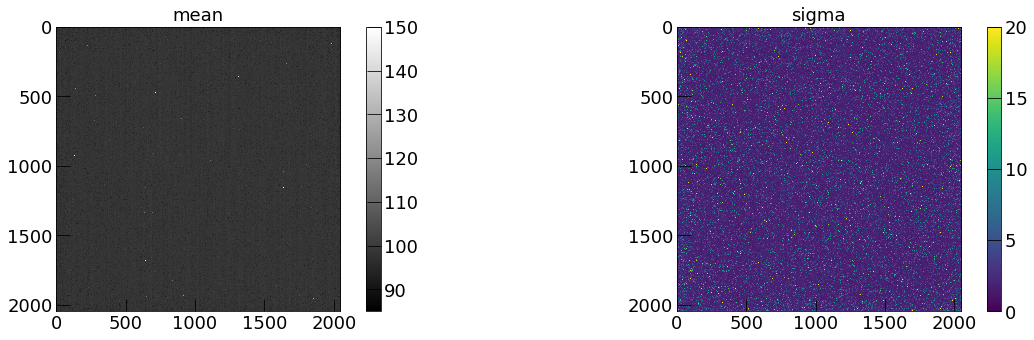

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


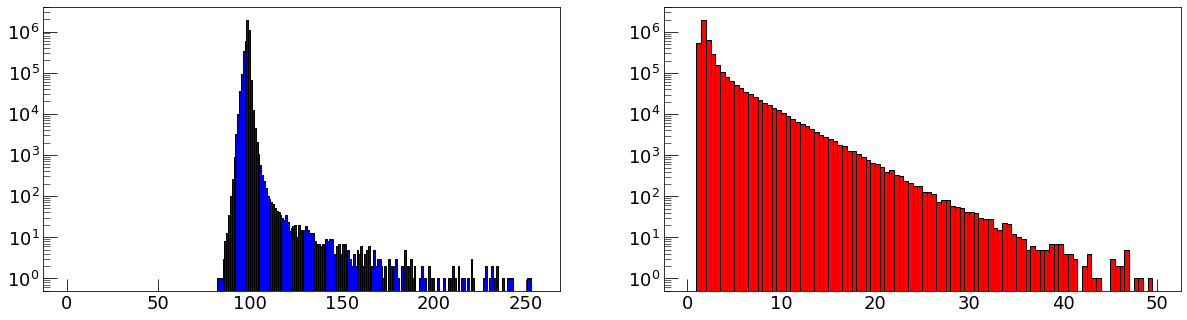

In [0]:
cy.set_atlas_style('long')
run = 2340
try:
    fileoutm = ("./data/run%d_mean.h5" % (run))
    imagem = cy.read_image_h5(fileoutm)
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)
try: 
    fileouts = ("./data/run%d_sigma.h5" % (run))
    images = cy.read_image_h5(fileouts)
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)


fig, ax = plt.subplots(1,2)
im = ax[0].imshow(imagem, cmap="gray", vmin=85,vmax=150)
fig.colorbar(im, ax=ax[0])
ax[0].set_title("mean")
ax[1].set_title("sigma")
im = ax[1].imshow(images, vmin=0,vmax=20)
fig.colorbar(im, ax=ax[1])
plt.show()
fig, ax = plt.subplots(1,2)
ax[0].hist(imagem.ravel(), bins=256, range=(0.0, 256.0), fc='b', ec='k')
ax[1].hist(images.ravel(), bins=100, range=(0.0, 50.0), fc='r', ec='k')
ax[0].set_yscale("log")
ax[1].set_yscale("log")

plt.show()